* 데이터셋 소개

    * 이 데이터 세트에는 과일 세트의 다양한 속성에 대한 정보가 포함되어 있어 과일의 특성에 대한 통찰력을 제공합니다. 데이터 세트에는 과일 ID, 크기, 무게, 단맛, 바삭함, 과즙, 숙성도, 신맛, 품질과 같은 세부 정보가 포함됩니다.
    ('https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data')

    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * A_id : 각 과일의 고유 식별자
        * 크기 : 과일의 크기
        * Weight: 과일의 무게
        * Sweetness: 과일의 단맛 정도
        * Crunchiness: 과일의 아삭함을 나타내는 질감
        * Juiciness: 과일의 과즙이 풍부한 정도
        * Ripeness: 과일이 익는 단계
        * Acidity: 과일의 산도 정도
        * Quality: 과일의 전반적인 품질


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dndudxlah/PythonDataWorkspace/main/apple_quality.csv')
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

## 미션 1) - 데이터 로드와 피처엔지니어링 🔍📊

* 데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
* 필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
* 피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다. 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
# 결측치

df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

def clean_data(df):
  df.drop(columns=['A_id'], inplace=True)
  df.dropna(inplace=True)
  df = df.astype({'Acidity': 'float64'})

  encoder = LabelEncoder()
  df["Quality"] = encoder.fit_transform(df["Quality"])
  print("Class labels:", encoder.classes_)

  return df

df_clean = clean_data(df.copy())
df_clean.head()

Class labels: ['bad' 'good']


Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Quality  
0        1  
1        1  
2        0  
3        1  
4        1

In [ ]:
df_clean.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


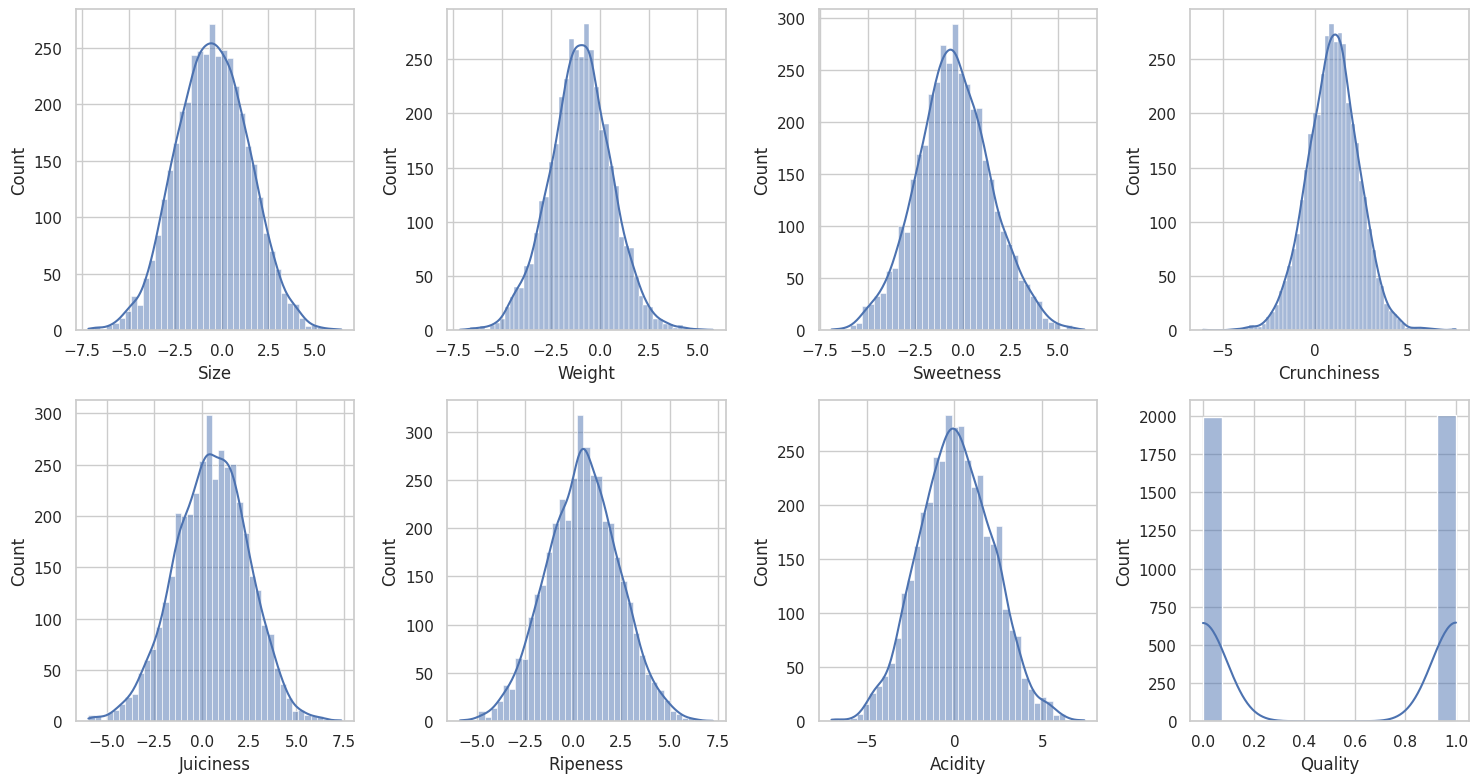

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
max     6.41    5.79       6.37         7.62       7.36      7.24     7.40   
min    -7.15   -7.15      -6.89        -6.06      -5.96     -5.86    -7.01   
median -0.51   -0.98      -0.50         1.00       0.53      0.50     0.02   

        Quality  
max        1.00  
min        0.00  
median     1.00

In [ ]:
#분포 확인
fig, axes = plt.subplots(nrows=2,ncols=4 , figsize = (15,8))
sns.set(style="whitegrid")
for i,col_name in enumerate(df_clean):
  cols = i % 4
  rows = i // 4
  sns.histplot(data=df_clean[col_name] ,ax=axes[rows][cols],kde=True)
plt.tight_layout()
plt.show()

#Scaler가 적용된건가? df.describe로 확인
display(df_clean.agg(['max','min','median']))

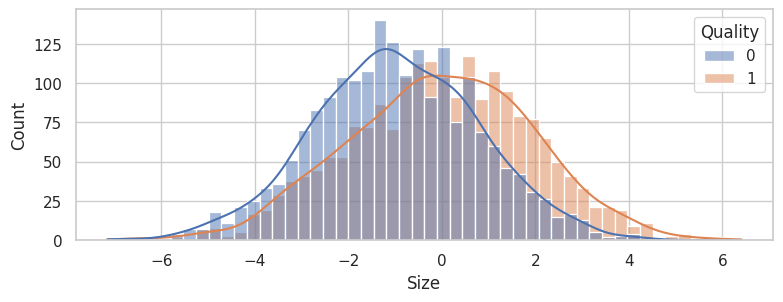

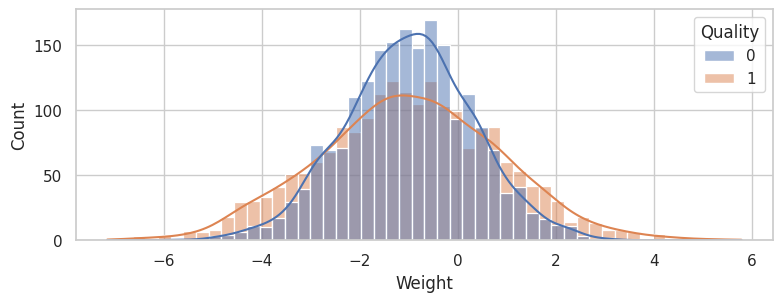

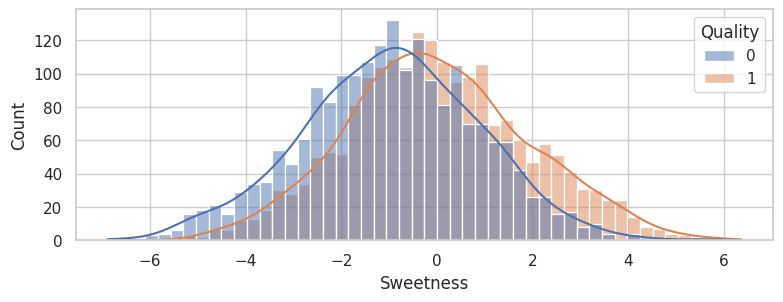

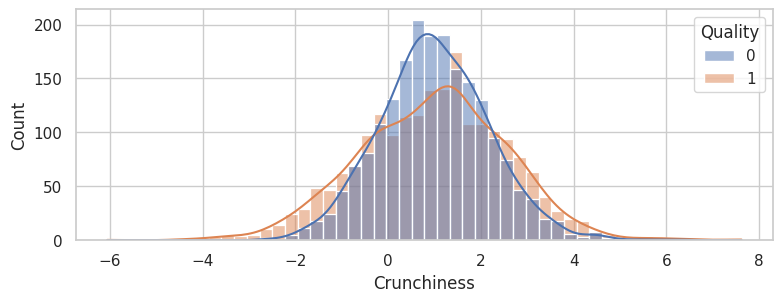

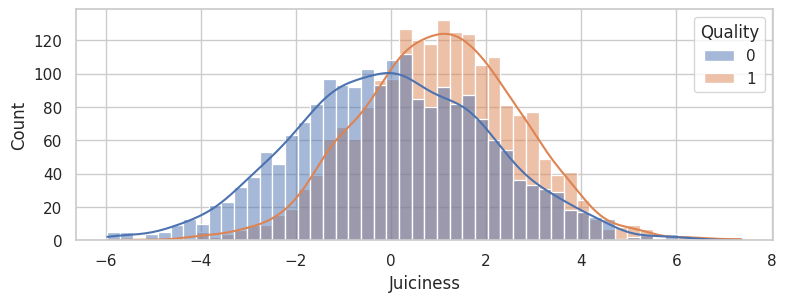

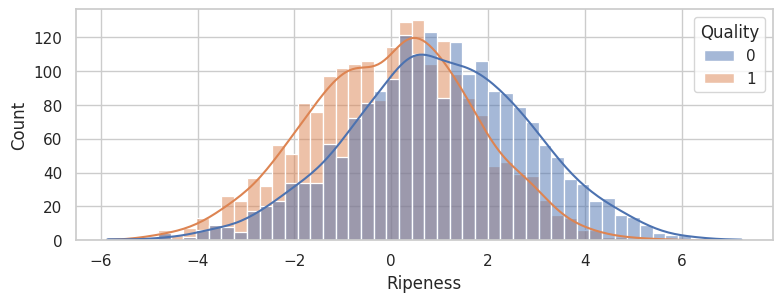

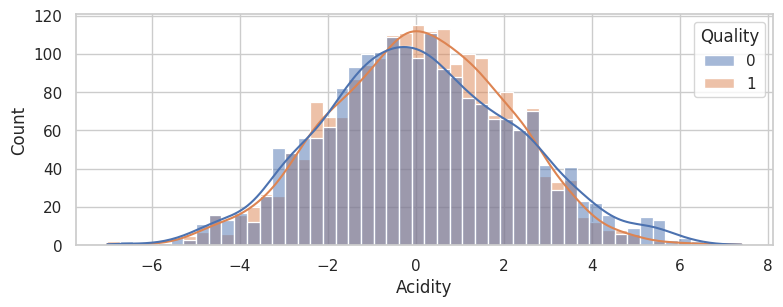

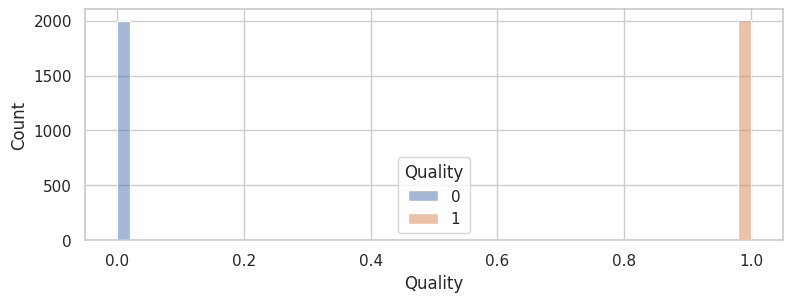

In [ ]:
#Quality에 따른 시각화
for column in df_clean[:-1]:
    fig, ax = plt.subplots(figsize=(9, 3))
    fig = sns.histplot(data=df_clean, x=column, hue="Quality", bins=50, kde=True)
    plt.show()

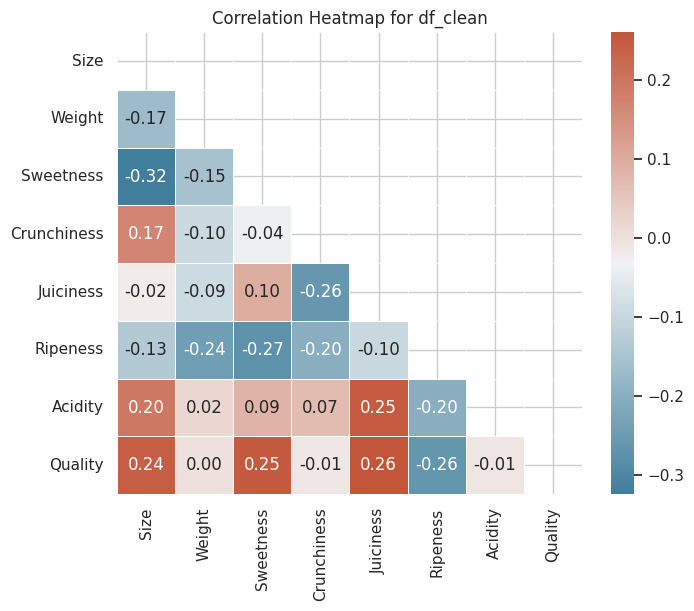

In [ ]:
correlation_matrix_clean = df_clean.corr()

mask = np.triu(np.ones_like(correlation_matrix_clean, dtype=bool))

# Heatmap
plt.figure(figsize=(7.5, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix_clean, mask=mask, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for df_clean')
plt.show()

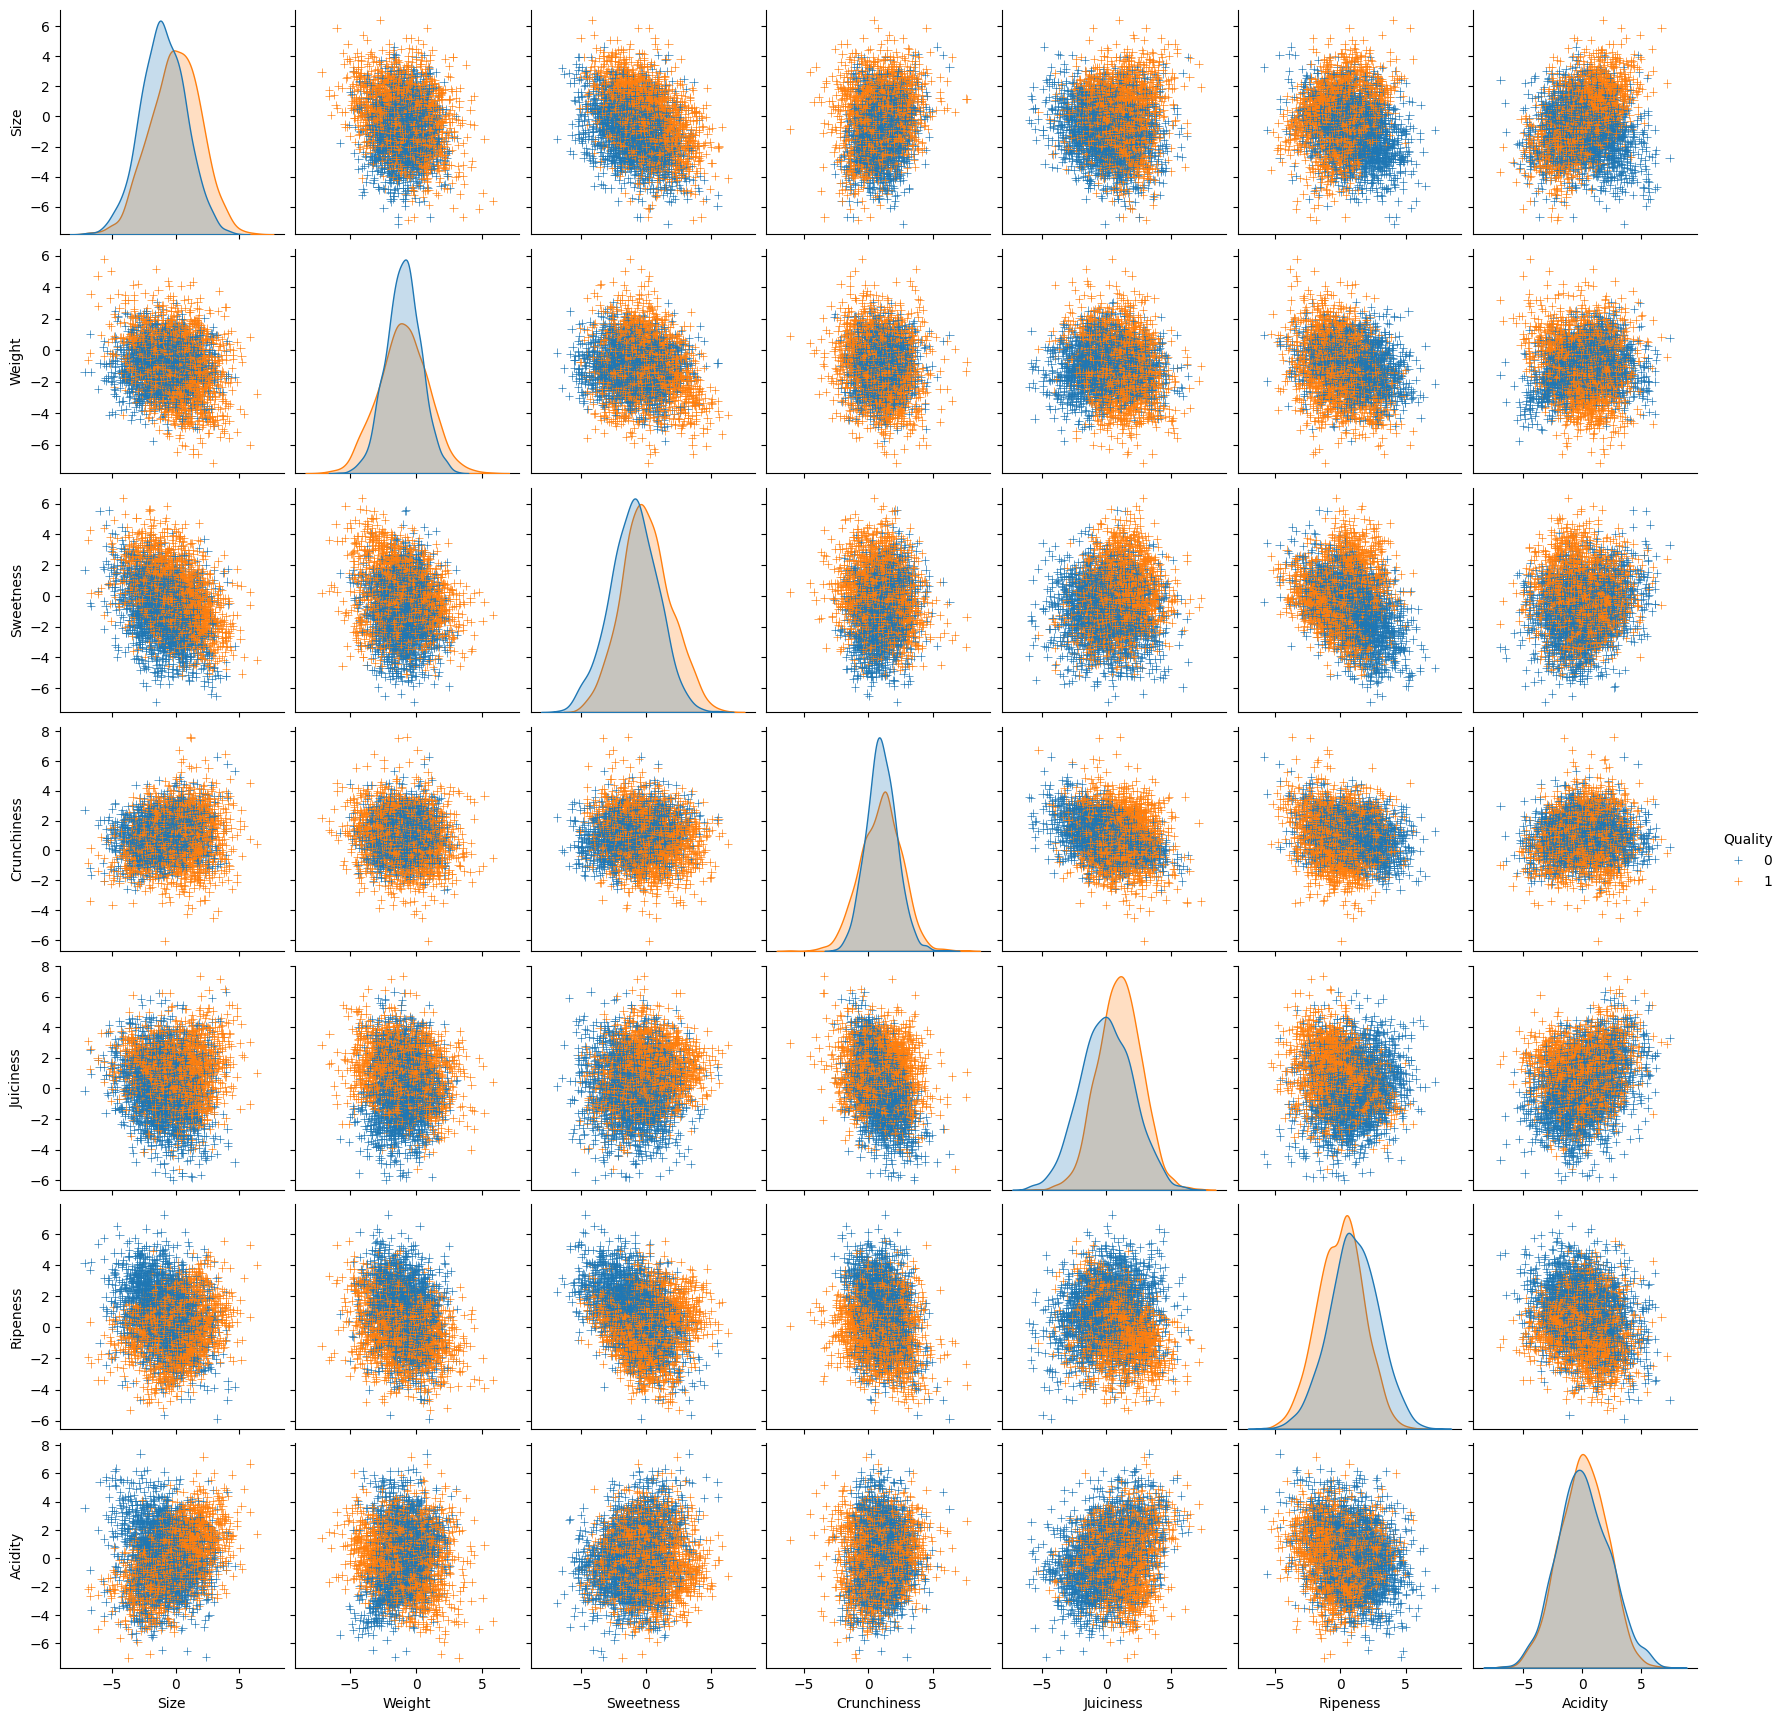

In [ ]:
g = sns.pairplot(df_clean, hue='Quality', markers='+')
plt.show()

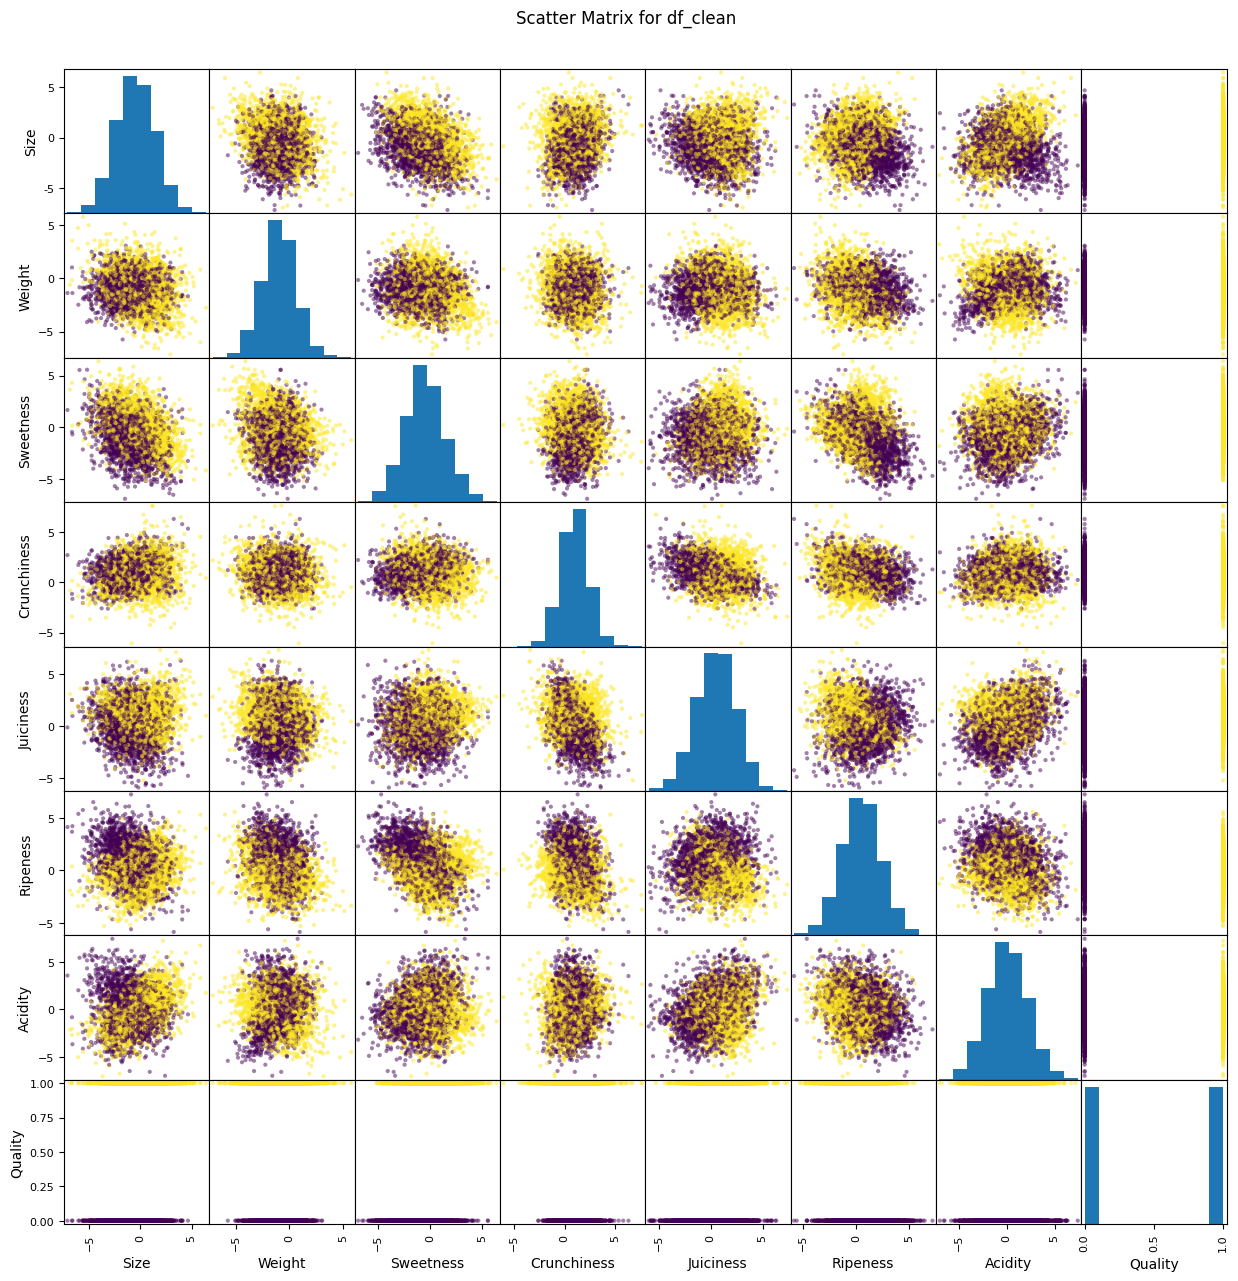

In [ ]:
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(df_clean, alpha=0.5, figsize=(15, 15), diagonal='hist', c=df_clean['Quality'], cmap='viridis')
plt.suptitle('Scatter Matrix for df_clean', y=0.92)
plt.show()

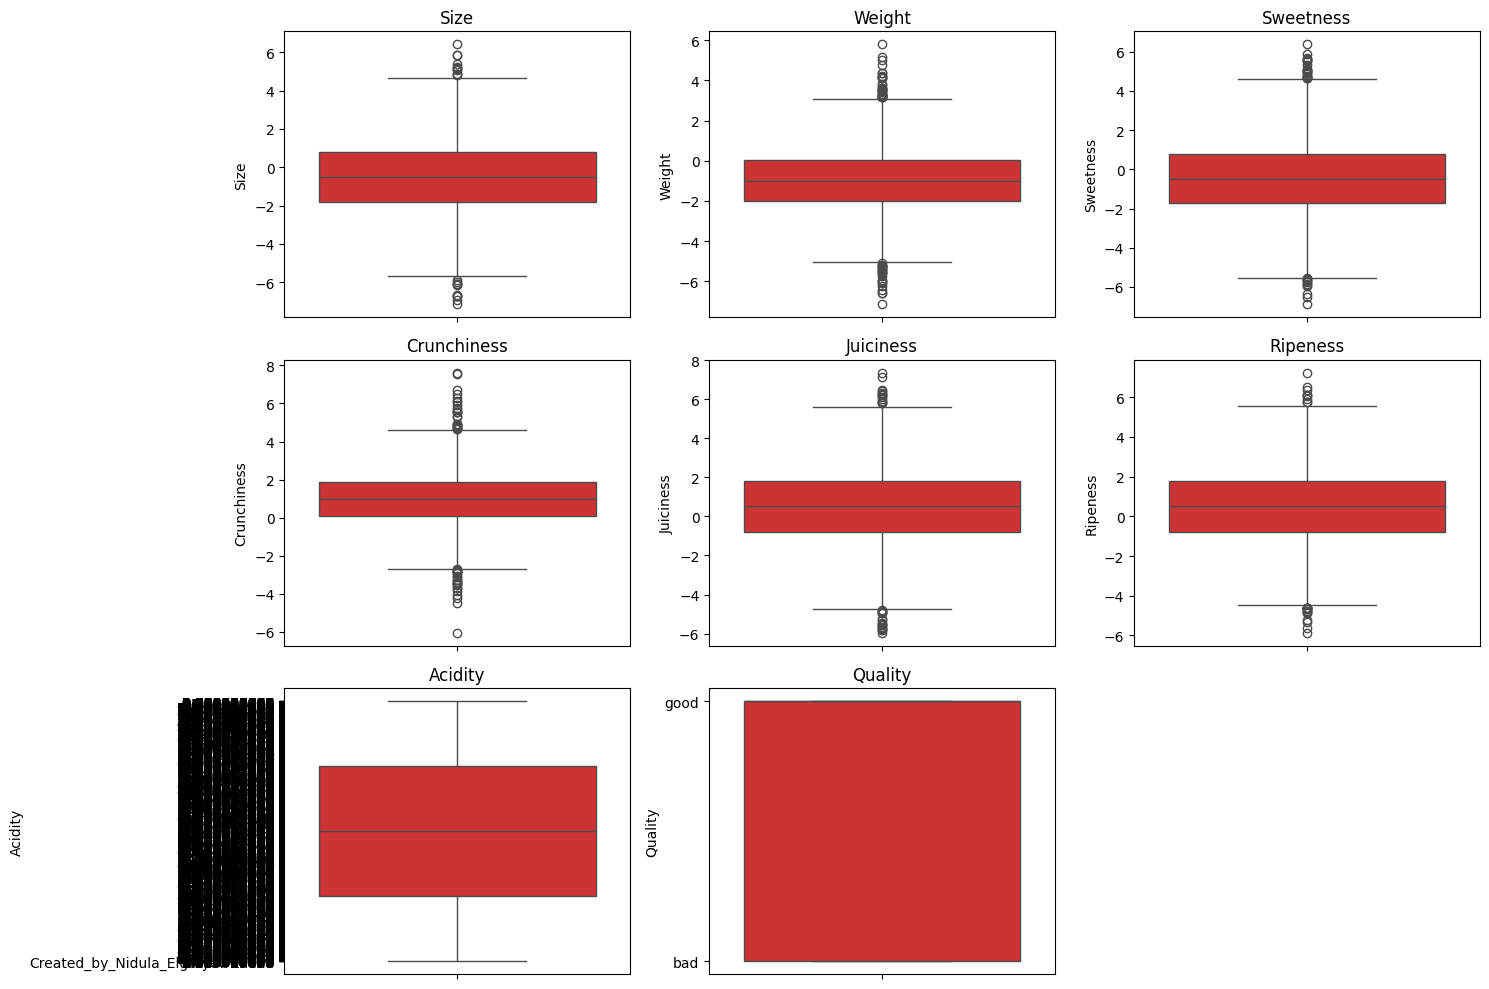

In [ ]:
#박스플
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Quality']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

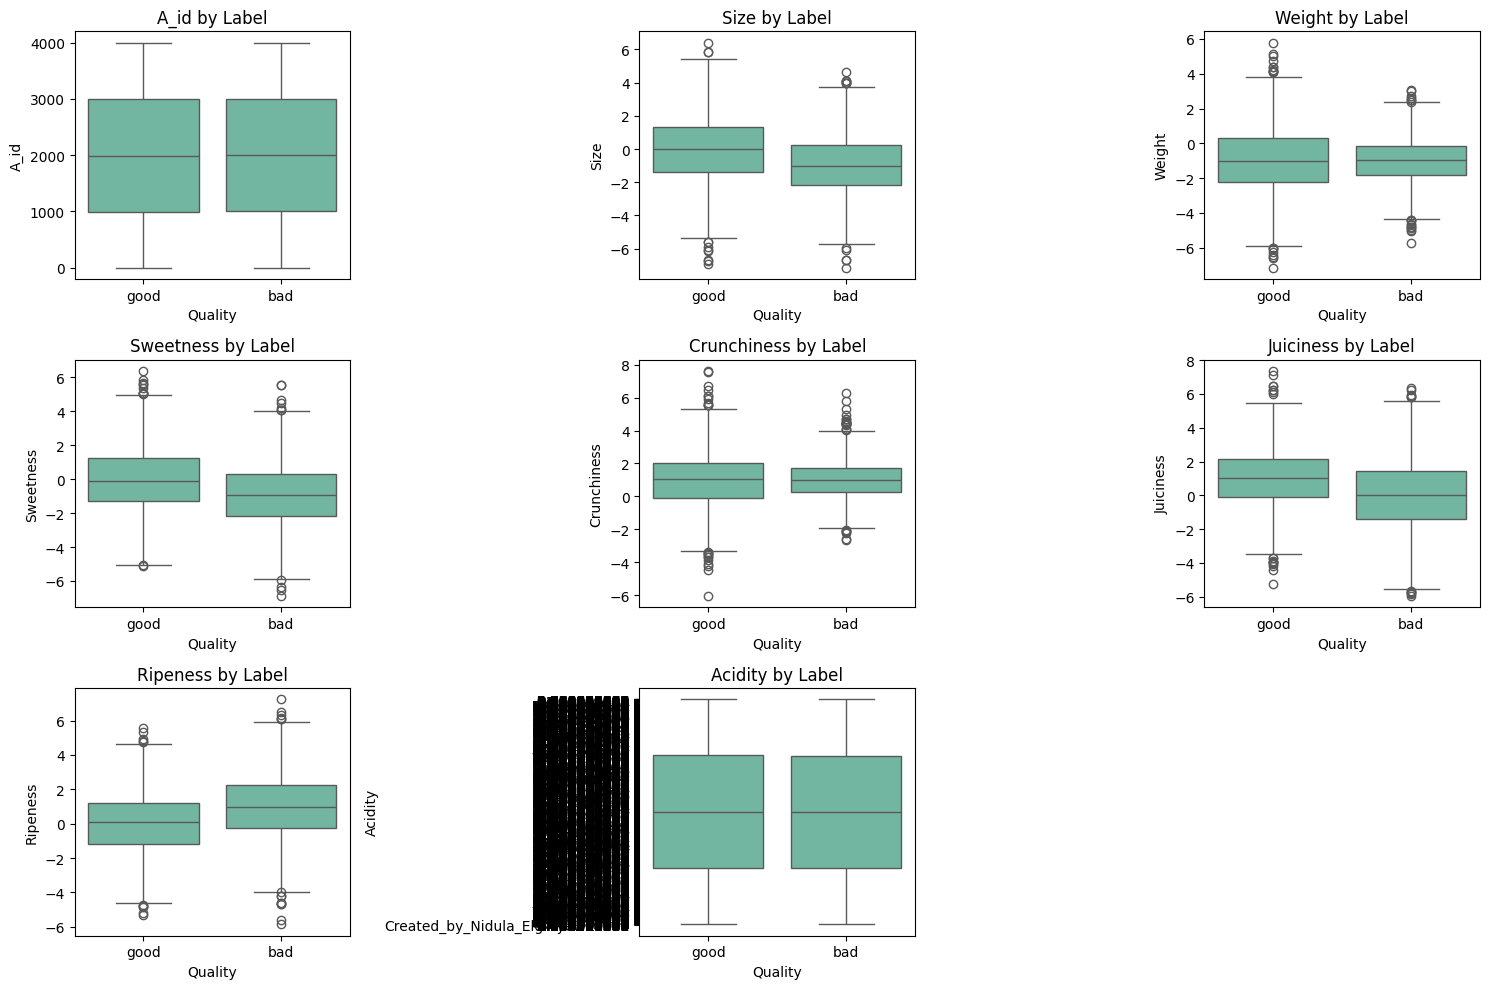

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality', y=column, data=df)
    plt.title(f'{column} by Label')

plt.tight_layout()
plt.show()

## 미션 2) - 모델 선택 🧠

* 분류 문제에 적합한 머신러닝 알고리즘을 선택합니다. 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다. 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

In [ ]:
!pip install lazypredict

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## 미션 3) 모델 훈련 🤖

* 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

In [ ]:
X = df_clean.drop('Quality', axis=1)
y = df_clean["Quality"]
display(X.head())
display(y.head())

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
0 -3.97   -2.51       5.35        -1.01       1.84      0.33    -0.49
1 -1.20   -2.84       3.66         1.59       0.85      0.87    -0.72
2 -0.29   -1.35      -1.74        -0.34       2.84     -0.04     2.62
3 -0.66   -2.27       1.32        -0.10       3.64     -3.41     0.79
4  1.36   -1.30      -0.38        -0.55       3.03     -1.30     0.50

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [ ]:
# 정규화

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

scaler = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scaler.fit_transform(X)

display(X.head())
display(X.describe())

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
0  0.23    0.36       0.92         0.37       0.59      0.47     0.45
1  0.44    0.33       0.80         0.56       0.51      0.51     0.44
2  0.51    0.45       0.39         0.42       0.66      0.44     0.67
3  0.48    0.38       0.62         0.44       0.72      0.19     0.54
4  0.63    0.45       0.49         0.40       0.67      0.35     0.52

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
count 4000.00 4000.00    4000.00      4000.00    4000.00   4000.00  4000.00
mean     0.49    0.48       0.48         0.51       0.49      0.49     0.49
std      0.14    0.12       0.15         0.10       0.14      0.14     0.15
min      0.00    0.00       0.00         0.00       0.00      0.00     0.00
25%      0.39    0.40       0.39         0.45       0.39      0.39     0.39
50%      0.49    0.48       0.48         0.52       0.49      0.49     0.49
75%      0.59    0.55       0.58         0.58       0.59      0.58     0.59
max      1.00    1.00       1.00         1.00       1.00      1.00     1.00

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
    )

In [ ]:
X_train.shape, y_train.shape

((3200, 7), (3200,))

In [ ]:
X_test.shape, y_test.shape

((800, 7), (800,))

In [ ]:
# 초기 알고리즘 탐색

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(custom_metric=None)
models = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:06<00:00,  4.34it/s]

[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250


In [ ]:
models

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.91               0.91     0.91      0.91   
 XGBClassifier                      0.91               0.91     0.91      0.91   
 SVC                                0.90               0.90     0.90      0.90   
 KNeighborsClassifier               0.90               0.90     0.90      0.90   
 ExtraTreesClassifier               0.90               0.90     0.90      0.90   
 LabelPropagation                   0.90               0.90     0.90      0.90   
 LabelSpreading                     0.90               0.90     0.90      0.90   
 RandomForestClassifier             0.90               0.90     0.90      0.90   
 NuSVC                              0.88               0.88     0.88      0.88   
 BaggingClassifier                  0.88               0.87     0.87      0.87   
 QuadraticDiscri

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scores = []
models = [
          LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42),
          SVC(random_state=42),
          KNeighborsClassifier(),
          ExtraTreesClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42),
          LogisticRegression(random_state=42),
          MLPClassifier(random_state=42, max_iter=2000),
          ]

#반복문 베이스라인 훈련
print('------------------------------------------------------------')
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    scores.append(accuracy_score(y_test, y_pred))

    print('***',model.__class__,'***')                                   #Class
    print("\n>>> Confusion Matrix for", model.__class__ ,":")                #confusion Matrix
    print(confusion_matrix(y_test, y_pred))
    print("\n>>> Accuracy of", model.__class__ ,":", accuracy * 100, '\n')  #Accuracy
    print(">>> Classification Report for" ,model.__class__, ":")
    print(classification_report(y_test,y_pred))                     #Report
    print('------------------------------------------------------------')
    model_name = type(model).__name__
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

------------------------------------------------------------
[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250
*** <class 'lightgbm.sklearn.LGBMClassifier'> ***

>>> Confusion Matrix for <class 'lightgbm.sklearn.LGBMClassifier'> :
[[361  40]
 [ 37 362]]

>>> Accuracy of <class 'lightgbm.sklearn.LGBMClassifier'> : 9037.5 

>>> Classification Report for <class 'lightgbm.sklearn.LGBMClassifier'> :
              precision    recall  f1-score   support

           0       0.91      0.90      0.90  

## 미션 4) 하이퍼파라미터 튜닝 ⚙️



* 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
* (참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

## MLP: Accuracy = 95.6250

MLPClassifier는 다층 퍼셉트론을 기반으로 하는 인공 신경망 분류 모델로, 여러 은닉층과 활성화 함수를 사용하여 복잡한 패턴을 학습한다.

1. hidden_layer_sizes | 은닉층의 크기를 튜플로 나타낸다. 예를 들어, (100,)는 하나의 은닉층이 100개의 뉴런을 가진다는 것을 의미.

2. activation | 은닉층에서 사용할 활성화 함수를 지정한다. 기본값은 'relu'이며, 다른 옵션으로 'logistic', 'tanh' 등이 있음.

3. solver | 가중치 최적화에 사용되는 알고리즘을 지정. 기본값은 'adam'

4. alpha | L2 정규화의 강도를 나타냄.
learning_rate: 가중치 업데이트에 사용되는 학습률을 설정.

5. max_iter | 최대 반복 횟수

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]}
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}

In [ ]:
grid_search.best_estimator_

MLPClassifier(max_iter=2000, random_state=42)

In [ ]:
grid_search.best_score_

0.9400000000000001

In [ ]:
grid_search.score(X_test, y_test) * 100

95.625

In [ ]:
best_mlp_model = grid_search.best_estimator_
mlp_predicted = best_mlp_model.predict(X_test)

mlp_acc_score = accuracy_score(y_test, mlp_predicted)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predicted)

mlp_acc_score

0.95625

### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'hidden_layer_sizes': [(50,), (100,)],
                    'activation': ['relu', 'tanh'],
                    'alpha': [0.0001, 0.001]}
randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(max_iter=2000, random_state=42),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(50,), (100,)]},
                   random_state=42, scoring='accuracy')

In [ ]:
randomized_search.best_params_

{'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}

In [ ]:
randomized_search.best_estimator_

MLPClassifier(max_iter=2000, random_state=42)

In [ ]:
randomized_search.best_score_

0.9400000000000001

In [ ]:
randomized_search.score(X_test, y_test) * 100

95.625

## SVC: Accuracy = 90.7500

Support vector machine(SVM)은 패턴인식 , 자료분석을 위한 superviused model이다. 주로 분류와 회귀 분석을 위해 사용되며 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을때, SVM 알고리즘은
1. C
|정규화 파라미터로,이값이 클수록 정규화 강도가 약하다. 기본값은 1

1. Kernel
|커널을 결정하며 linear(선형), poly(다항),rbf(가우시안) , sigmoid(시그모이드)중 하나로 선택

1. gamma
|RBF,다항,시그모이드 커널에 포함된 하이퍼 파라미터

1. degree
|다항 커널에 포함된 하이퍼파라미터 d

1. coef()
|다항 커널과 시그모이드 커널에 포함된 세타



### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=42)
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 'auto'}

In [ ]:
grid_search.best_estimator_

SVC(C=1, gamma='auto', random_state=42)

In [ ]:
grid_search.best_score_

0.9112499999999999

In [ ]:
grid_search.score(X_test, y_test) * 100

92.375

### RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'C': [0.1, 1, 10, 100],
                       'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}
randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1, 10, 100]},
                   random_state=42, scoring='accuracy')

In [ ]:
randomized_search.best_params_

{'gamma': 'auto', 'C': 1}

In [ ]:
randomized_search.best_estimator_

SVC(C=1, gamma='auto', random_state=42)

In [ ]:
randomized_search.best_score_

0.9112499999999999

In [ ]:
randomized_search.score(X_test, y_test) * 100

92.375

## XGBClassifier: Accuracy = 90.6250

1. Tree_method (Tree Building Method)  
| 트리를 만드는 방법을 설정하는 파라미터로 xgboost에만 존재하며, 모델성능과 학습시간에 영향을 준다.
정확한 학습을 위해서는 Exact method('exact'), 학습속도를 높이기 위해서는 Approximate method('approx', 'hist', 'gpu_hist')를 이용하는 것이 좋다.  

1. learning_rate  
| 부스팅 각 이터레이션 마다 곱해지는 가중치(loss function의 step size)로 모형 성능과 학습시간에 영향을 준다.  
보통 작을수록 모형 성능 향상에 도움이 되지만 학습 시간은 길어지는 trade-off가 있다.
하이퍼파라미터 튜닝시에는 0.1~0.3 정도의 값을 사용하고, 최종 모형 학습시에는 0.05이하의 값을 사용하는 것이 좋다.

1. n_estimators(Number of Lterations)  
|부스팅 이터레이션 수로 모델 성능과 학습시간, 램 사용량에 영향을 준다. 클수록 train 데이터에 오버피팅 된다. 큰 값을 넣은 후에 early stopping과 함께 사용하는 것이 좋다.  

1. max_depth(Maximum Depth)  
|각 트리의 최대 깊이. 최대 리프 수(Maximum Leaves), 모형 성능, 학습 시간에 영향을 준다. 클수록 학습 데이터에 피팅이 잘 되지만 오버피팅될 가능성도 높아진다. 보통 3~12의 값을 사용한다. 가장 먼저 튜닝해야 할 하이퍼파라미터이다.

1. max_leaves or num_leaves (Maximum Leaves)  
| 각 트리의 최대 리프 수. 트리의 최대 깊이, 모형 성능, 학습속도에 영향을 미친다. Maximum Depth와 함께 튜닝하는 것이 좋다. Maximum Leaves의 파라미터명은 xgboost에서는 max_leaves, lightgbm에서는 num_leaves이다. xgboost의 디폴트 값은 255이고, lightgbm의 디폴트 값은 31이다.

1. subsample or bagging_fraction (Row Sampling)  
|각 이터레이션에 사용되는 행의 비율. Early Stopping, 모형 성능, 학습시간에 영향을 미친다. 보통 0.7 정도의 값을 사용하고, 너무 세세하게 튜닝할 필요는 없다.xgboost의 파라미터 명은 subsample이고, lightgbm의 파라미터 명은 bagging_fraction이다. 사이킷런 API에서는 둘 다 subsample로 사용할 수 있다. xgboost와 lightgbm 모두 디폴트 값은 1이고,  lightgbm에서 boosting_type='goss' 일 때는 Row sampling이 허용되지 않는다.

1. colsample_bytree or feature_fraction (Columns Sampling by Tree)  
|각 이터레이션에 사용되는 칼럼의 비율. Early Stopping, 모형 성능, 학습시간에 영향을 미친다. 보통 0.7 정도의 값을 사용하고, 너무 세세하게 튜닝할 필요는 없다. xgboost의 파라미터명은 colsample_bytree이고, lightgbm의 파라미터명은 feature_fraction이다. 사이컷런 API에서는 모두 colsample_bytree로 사용할 수 있다. xgboost와 lightgbm 모두 디폴트 값은 1이다.

In [ ]:
max_depth = np.random.randint(1, 20, 10) # 1~20 값을 랜덤하게 10개
max_depth

array([13, 13, 18,  8,  7,  3, 12, 12,  7,  8])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier(random_state=42)
param_distributions = {'learning_rate': [0.01, 0.1, 0.2],
                      'n_estimators': [100, 200, 300],
                      'max_depth': max_depth}
randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy')
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': array([13, 13, 18,  8,  7,  3, 12, 12,  7,  8]),
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [ ]:
randomized_search.best_params_

{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}

In [ ]:
randomized_search.best_score_

0.884375

In [ ]:
randomized_search.score(X_test, y_test) * 100

90.5

## LGBMClassifier: Accuracy = 90.3750

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = LGBMClassifier(random_state=42)
param_distributions = {'learning_rate': [0.01, 0.1, 0.2],
                      'n_estimators': [100, 200, 300],
                      'max_depth': [3, 5, 7]}
randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy')
randomized_search.fit(X_train, y_train)

In [ ]:
randomized_search.best_params_

{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
randomized_search.best_score_

0.8825

In [ ]:
randomized_search.score(X_test, y_test) * 100

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


91.25

## 미션 5) 모델 평가 및 선택 🎯

* 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.

In [ ]:
#평가
mlp_acc_score = accuracy_score(y_test, mlp_predicted)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predicted)

mlp = MLPClassifier(random_state=42, max_iter=2000)

print('***',mlp.__class__ ,'***')
print("\nConfusion Matrix:")
print(mlp_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", mlp_acc_score * 100, '\n')
print("Classification Report:")
print(classification_report(y_test, y_pred))

*** <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> ***

Confusion Matrix:
[[384  17]
 [ 18 381]]

Accuracy of Support Vector Classifier: 95.625 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       401
           1       0.96      0.95      0.96       399

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



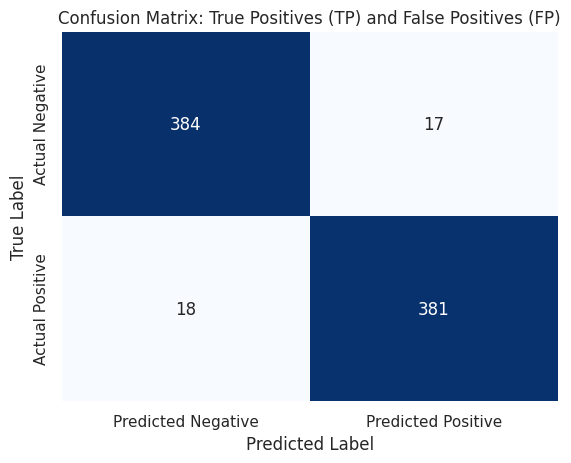

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: True Positives (TP) and False Positives (FP)')
plt.show()

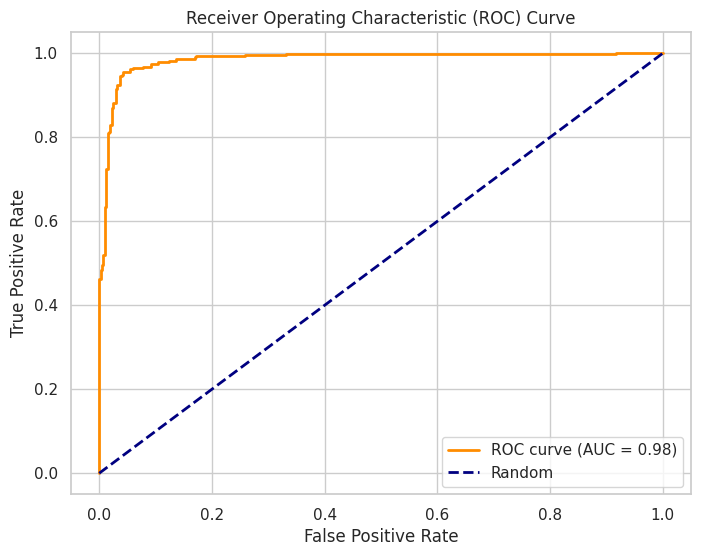

In [ ]:
from sklearn.metrics import roc_curve, auc
# best_mlp_model의 predict_proba 메서드를 사용하여 클래스 확률을 얻습니다.
y_prob = best_mlp_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#AUC는 ROC 커브 (주황선)아래의 면적을 뜻하며 1에 가까울수록 더 이진분류를 잘 한다고 볼수있음